# Linear Regression

**This project aims to use python as an equivalent of the R Linear Regression project.**

The first step is to import some of the packages that will be used in the course of this project. 

In [1]:
# importing the needed packages
import warnings                     # Module to suppress warning                              
warnings.filterwarnings('ignore')   # Never display warnings which match
warnings.simplefilter("ignore")     # Filterwarnings(action, category=DeprecationWarning)

# Pandas and Numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
                             

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

import sys  # This module gives access to system-specific parameters and functions
import os   # The OS module provides functions for interacting with the operating system

import glob # use to find files

In mathematics, regression is a statistical technique that is employed when the relationship between dependent variables and independent variables is considered. This process is used to determine if the changes in the dependent variables are connected with any of the independent variables.

**Linear regression**

This is the most commonly used type of predictive analysis. In simple terms, this is a linear (arranged along a straight line) approach for relationship modeling between two variables. The variables are always **dependent** and **independent**. It is important to note that the order of the variables matters. The independent variable belongs on the x-axis, while the dependent variable belongs on the y-axis.

There are two types of linear regression: 

i. Simple Linear Regression

ii. Multiple Linear Regression

The linear regression for two variables is based on the linear equation $y = mx + c$ where m and c are constants. 

The graph of a linear equation of the form above is a *straight line*. 

**Example** 
Plot the graph of $y = 2x + 6$ using the range -3 to 3. 

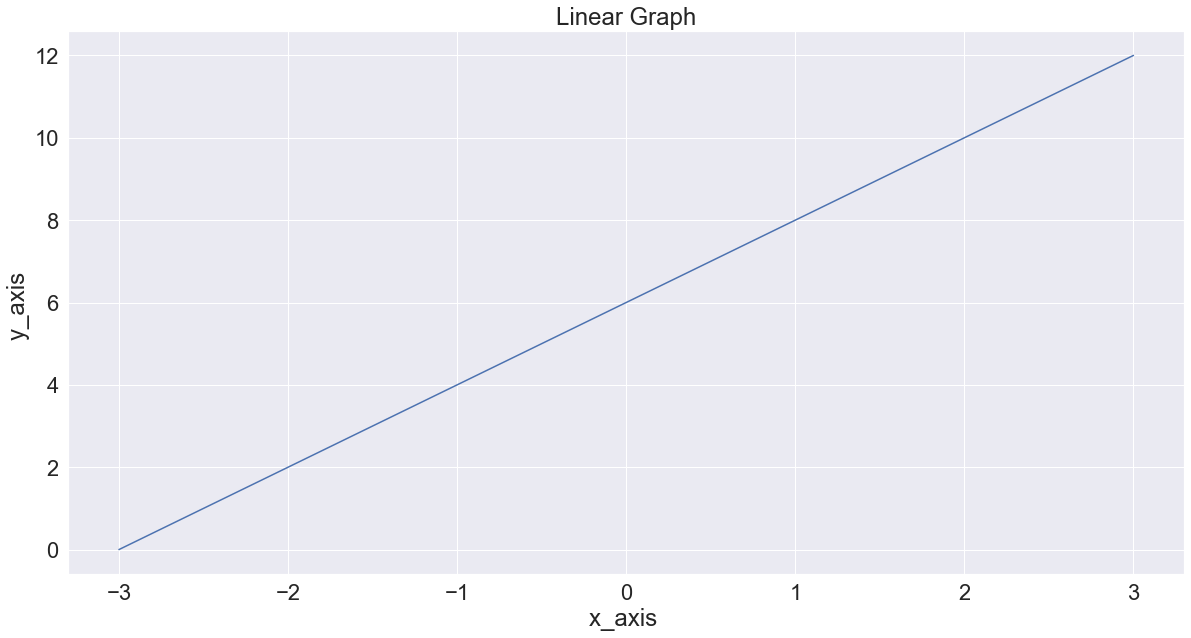

In [2]:
# define data values
x = np.array([-3, -2, -1, 0, 1, 2, 3])  # X-axis points
y = 2 * x + 6  # Y-axis points
  
plt.plot(x, y) # Plot the chart
plt.title('Linear Graph')
plt.xlabel('x_axis ')
plt.ylabel('y_axis ')
plt.show() # display

The equation for linear regression is $$y= b_1 X + b_0$$. 

But in a more standard form, the complete linear regression model is: $$ y = b_1X + b_0 + \epsilon$$

where:

y is the predicted value 

$b_0$ is the intercept.

$b_1$ is the regression coefficient in the equation form, and the slope in modeling form.

X is the independent variable 

$\epsilon$ is the error of the estimate.

The aim of linear regression is to find the line of best fit that goes through the data set. This is achieved by searching for $b_1$ the regression coefficient that will minimize the $\epsilon$ the error of the model.   



In the world of Data Science, *linear regression is an algorithm* that predicts the outcome from the linear relationship between the independent variables and dependent variables. From the foregoing, linear regression is classified as a supervised learning algorithm. 
There are some benefits to using linear regression

1. It is easily scalable.
2. It is easily implemented.
3. It is relatively straightforward.

The dataset for this example is available at the link: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?resource=download


In [3]:
# Reading in data into a dataframe 
data = pd.read_csv('salary.csv')

# Display top of dataframe
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Viewing the shape of the data.
data.shape

(30, 2)

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


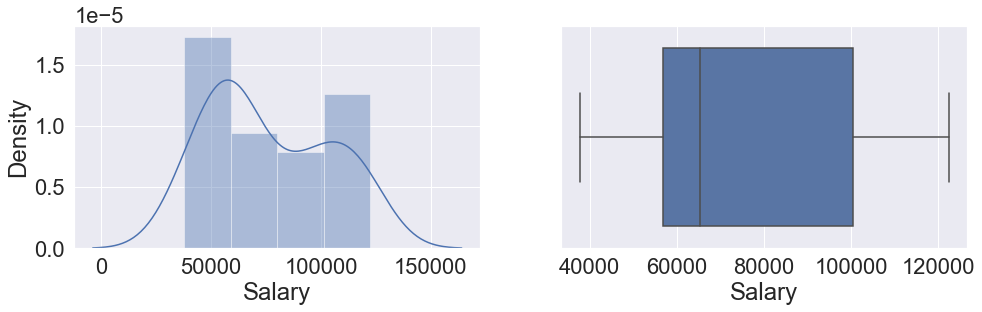

In [6]:
# viewing the salary column for outlier
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(data['Salary']) 
plt.subplot(2,2,2)
sns.boxplot(data['Salary'])
plt.show()

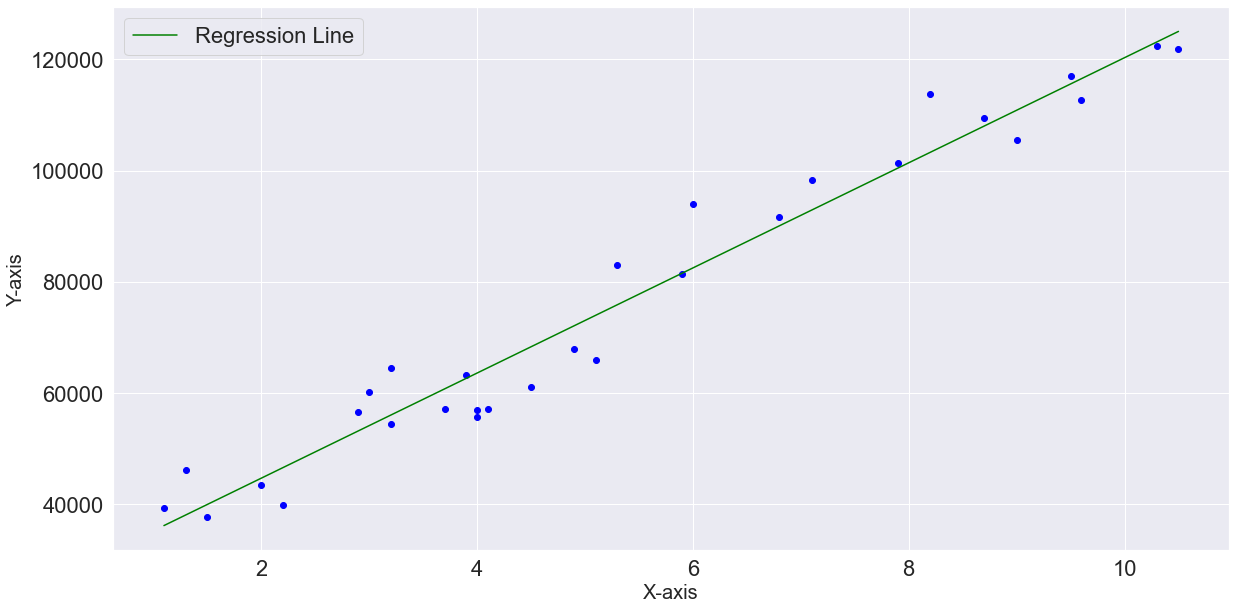

In [7]:
# Here is a scather plot with a regression line

plt.figure(figsize=(20, 10))
ax = plt.axes()
x = data["YearsExperience"]
y = data["Salary"]
plt.scatter(x, y, c ="blue")
ax.set_xlabel('X-axis', fontsize = 20)
ax.set_ylabel('Y-axis', fontsize = 20)

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# adding linear regression line to scatterplot 

plt.plot(x, m*x+b, color='green', label='Regression Line')
plt.legend()
plt.show()

In [8]:
# Splitting the data into the training data and testing data
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# regression coefficients or slope
print('Coefficients: ', regressor.coef_)

Coefficients:  [9423.81532303]


In [11]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Variance score: 0.9024461774180497


In [12]:
print(f"intercept: {regressor.intercept_}")

intercept: 25321.583011776813


In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

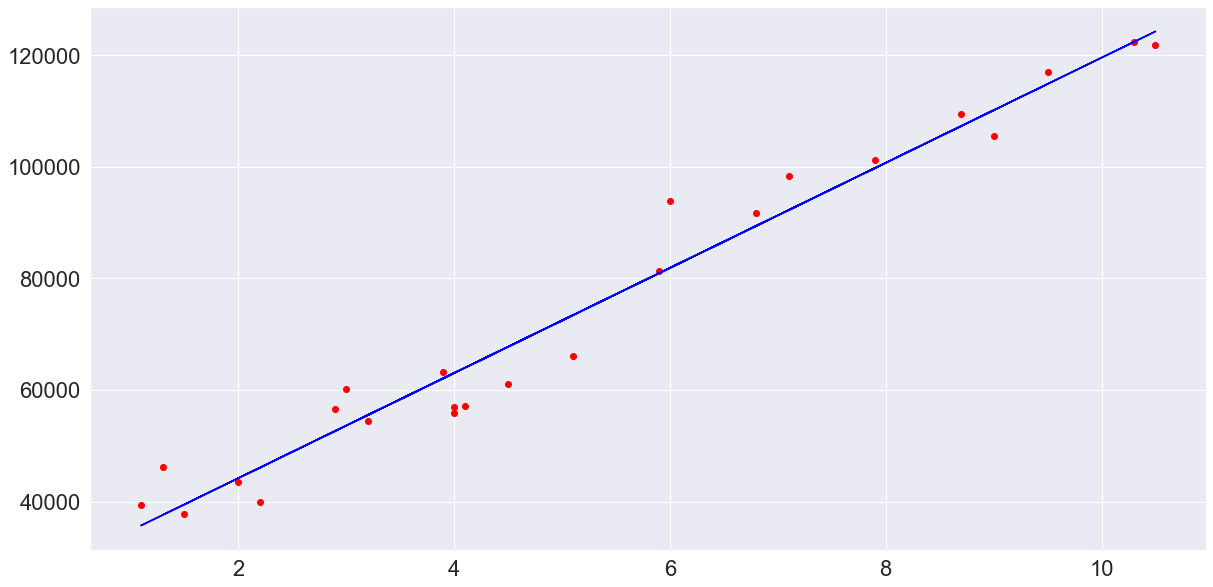

In [14]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

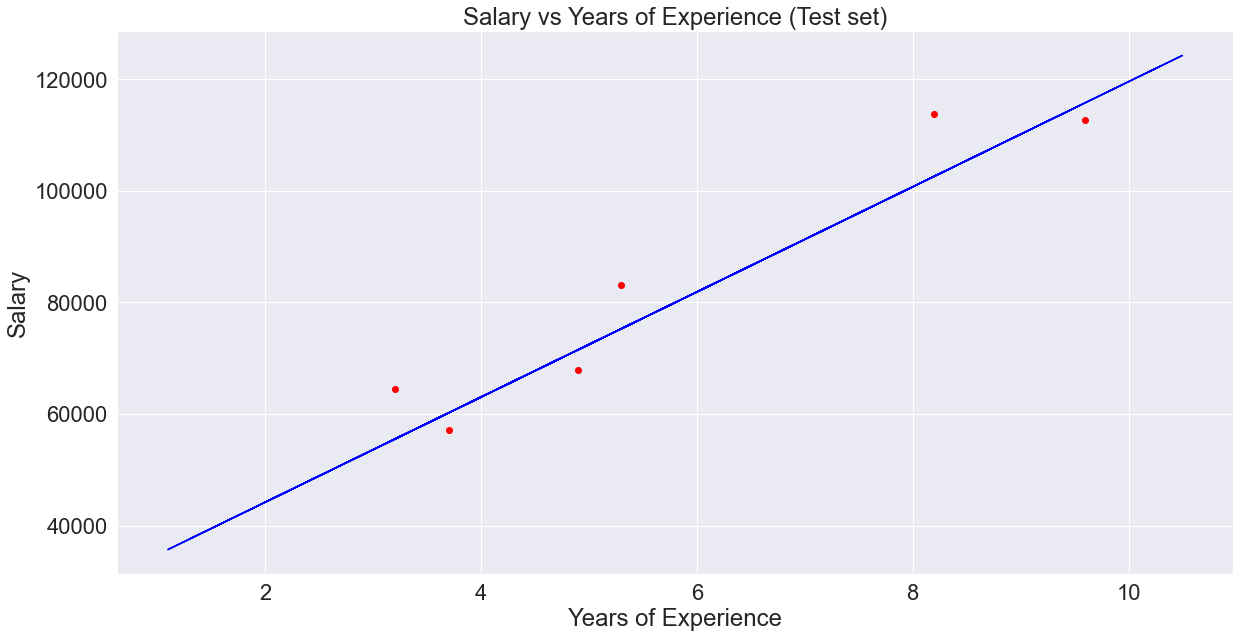

In [15]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Years of Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
r_sq = regressor.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9564379197293564


#### Making Predictions

In [17]:
def calc(Coefficients, intercept, YearsExperience):
    return Coefficients*YearsExperience+intercept

score = calc(regressor.coef_, regressor.intercept_, 10.3)
print(score)

[122386.880839]


In [18]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual      Predicted
0  112635.0  115790.210113
1   67938.0   71498.278095
2  113812.0  102596.868661
3   83088.0   75267.804224
4   64445.0   55477.792045
5   57189.0   60189.699707


#### Evaluating the Model

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [20]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 6286.45
Mean squared error: 49830096.86
Root mean squared error: 7059.04


# Multiple Linear Regression

In [21]:
# Reading in data into a dataframe 
multi_data = pd.read_csv('petrol_consumption.csv')
# Display top of dataframe
multi_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [22]:
multi_data.shape 

(48, 5)

In [23]:
multi_data.describe(include='all')

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [24]:
# Checking the data to have an insight of the features and target
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


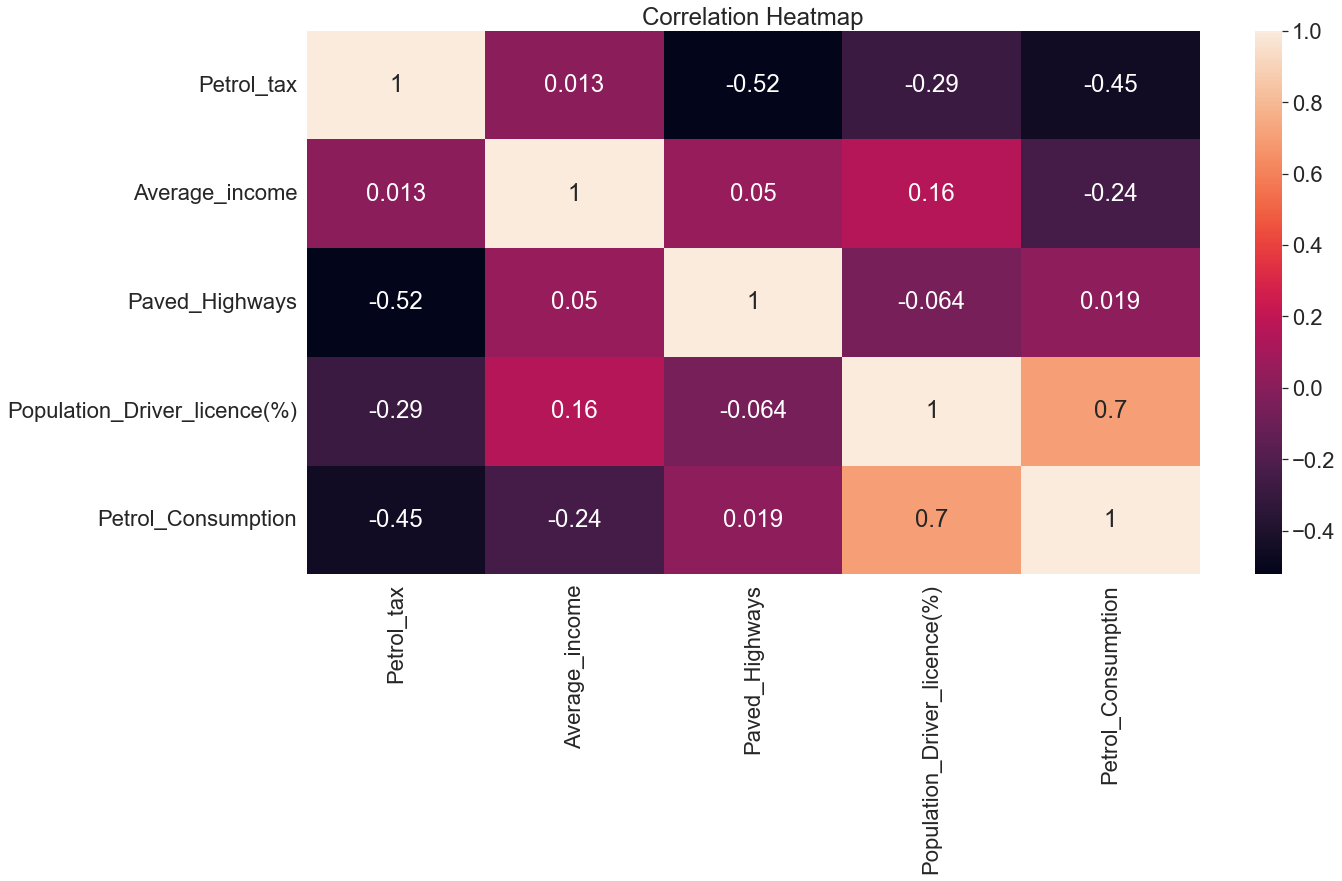

In [25]:
# Checking for the correlation
cor = multi_data.corr()
# annot=True displays the correlation values
sns.heatmap(cor, annot=True).set(title='Correlation Heatmap');

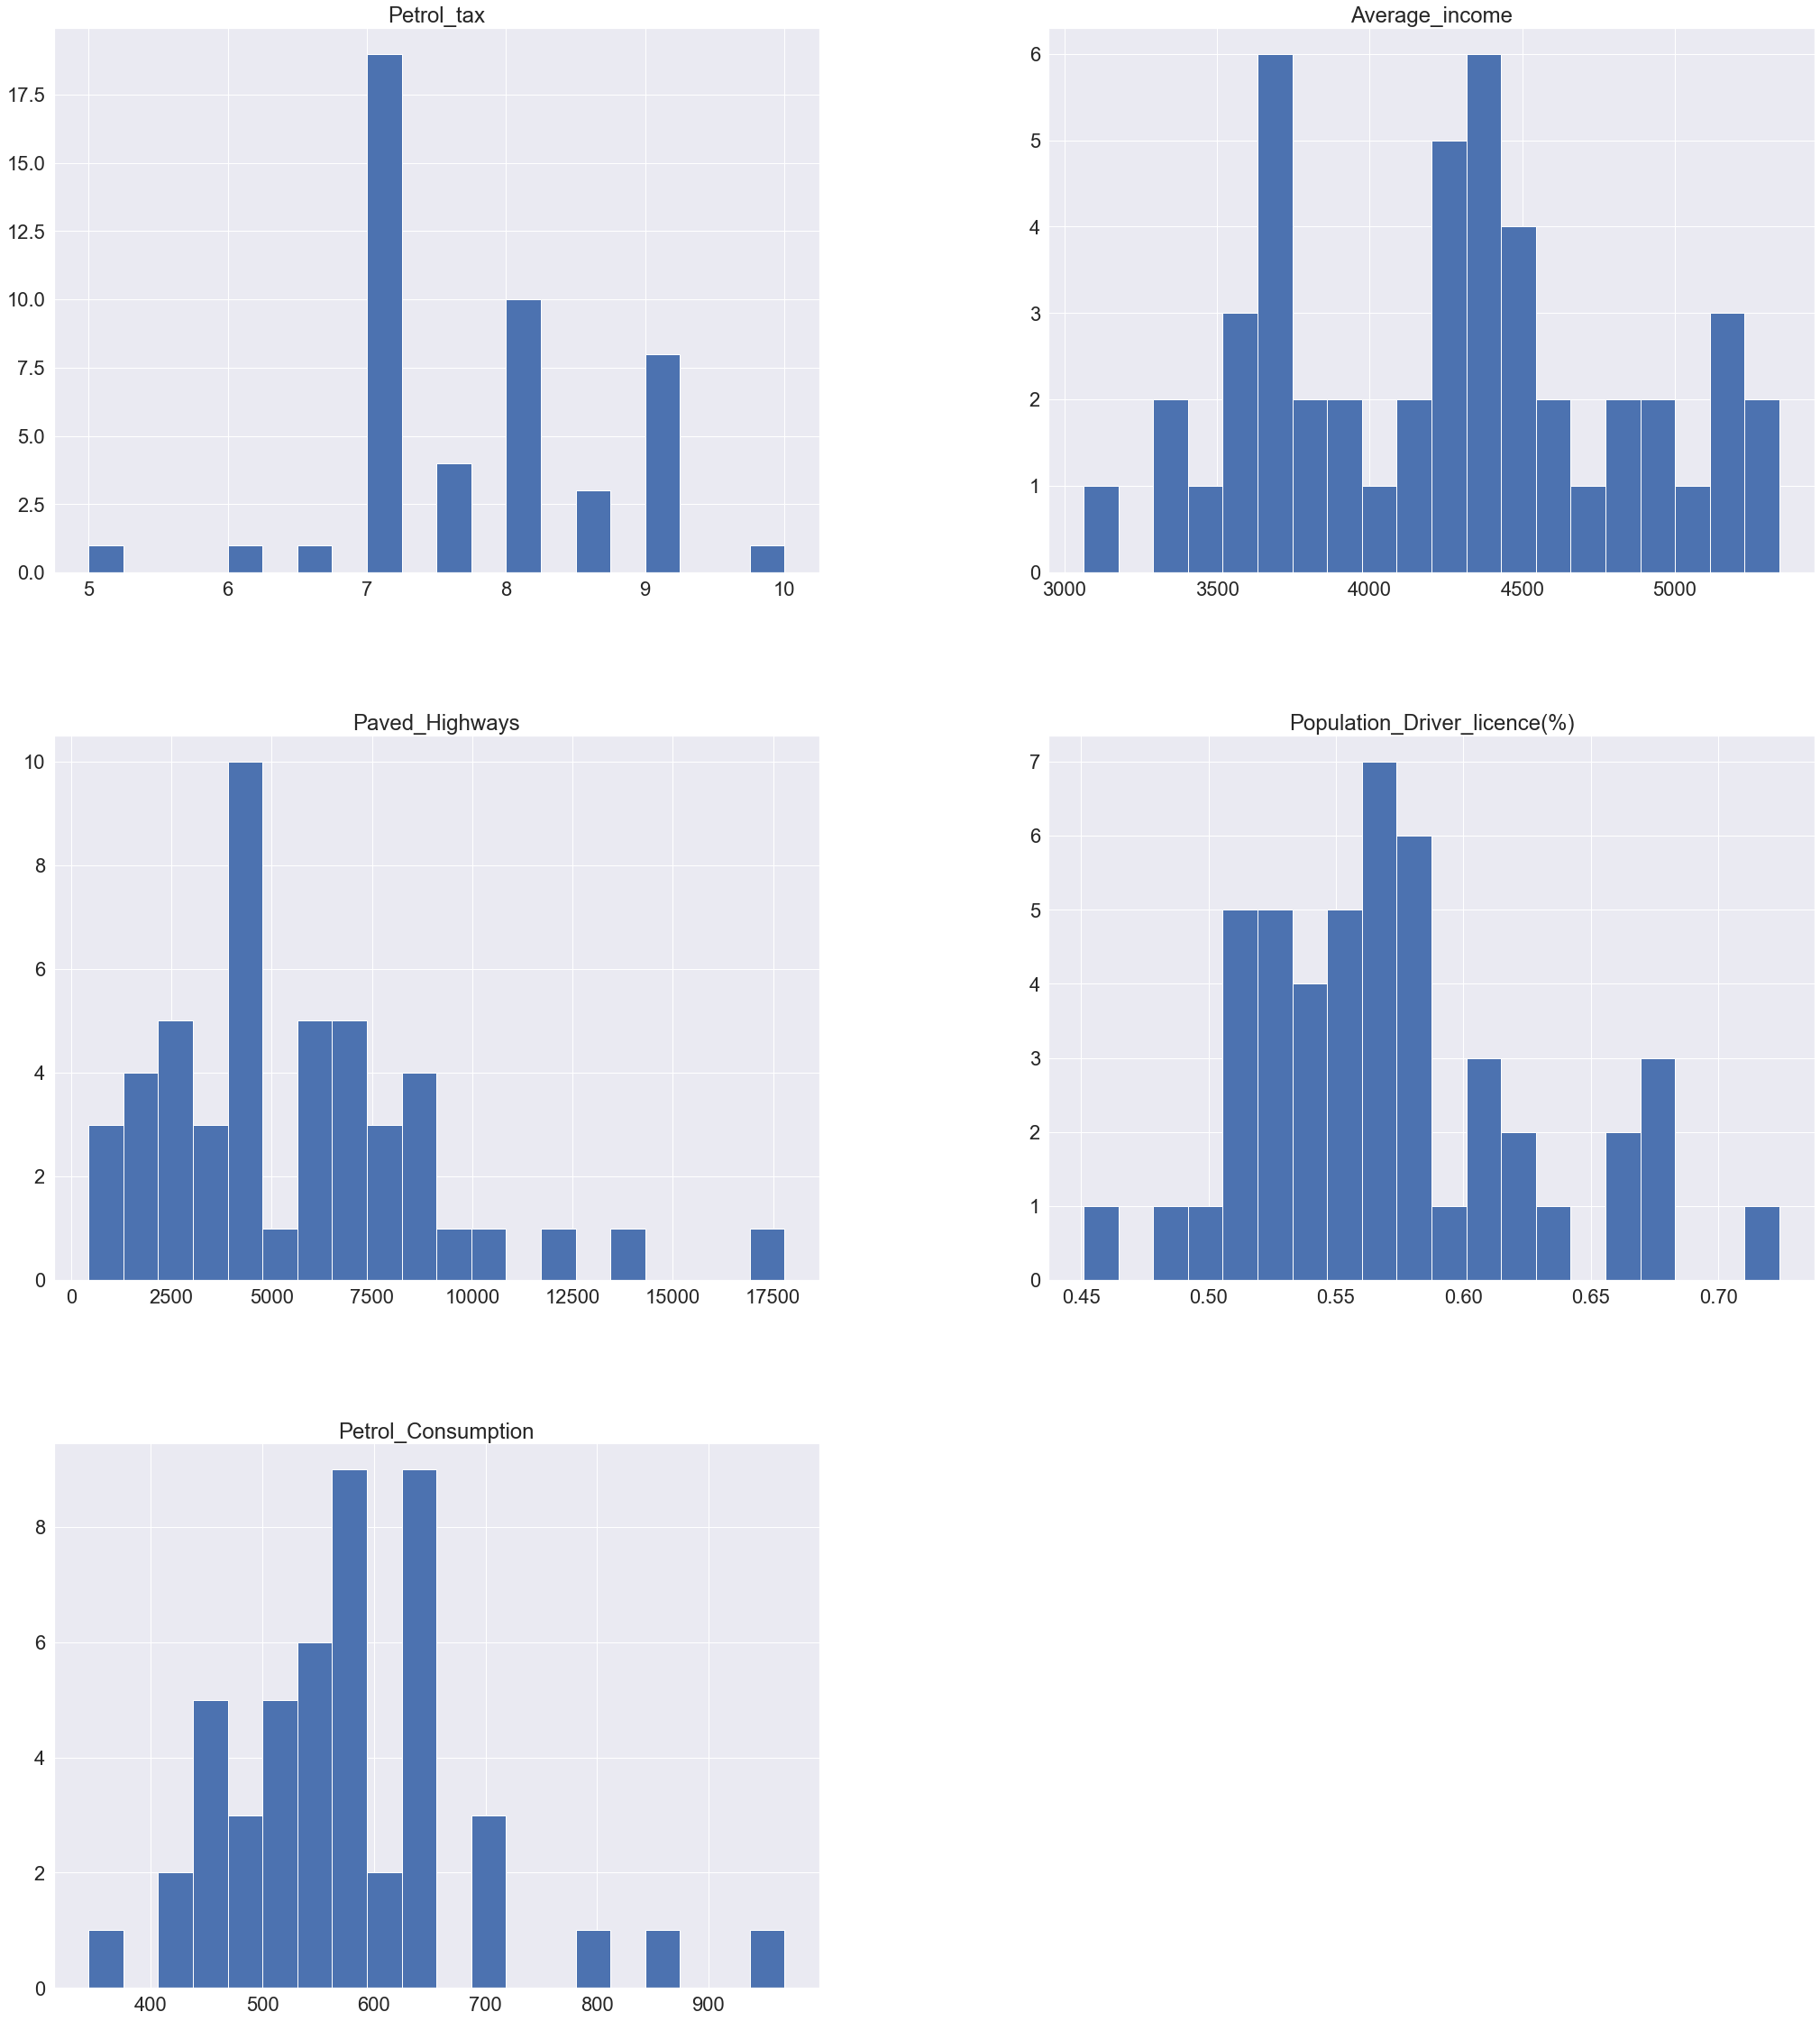

In [26]:
multi_data.hist(bins=20, figsize=(35,40))
plt.show() 

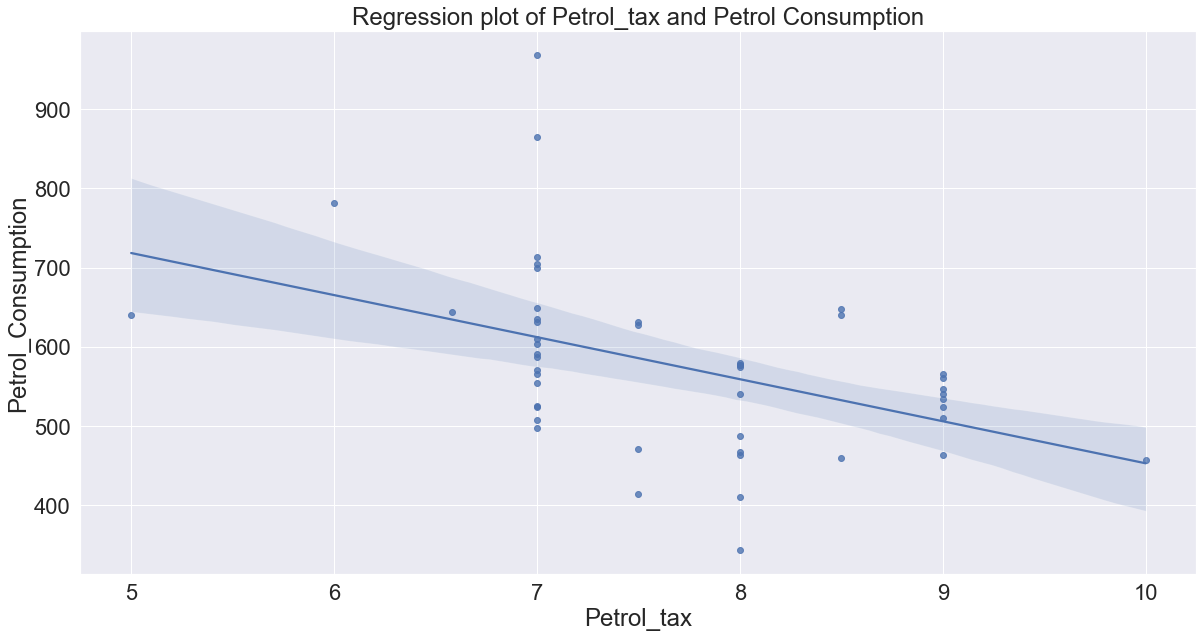

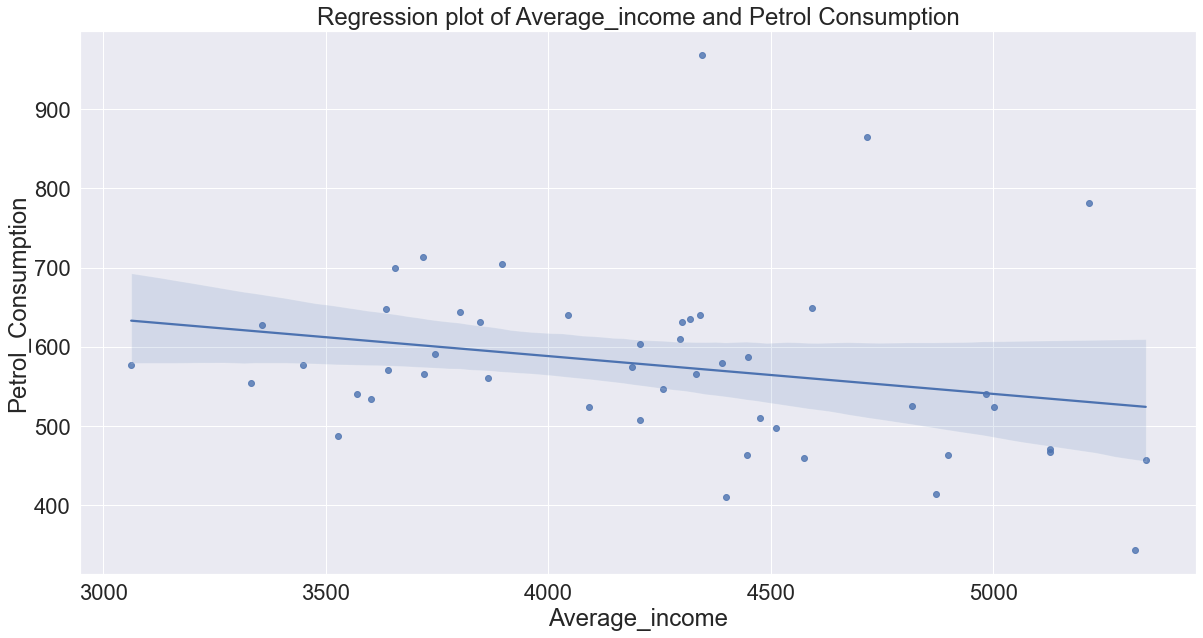

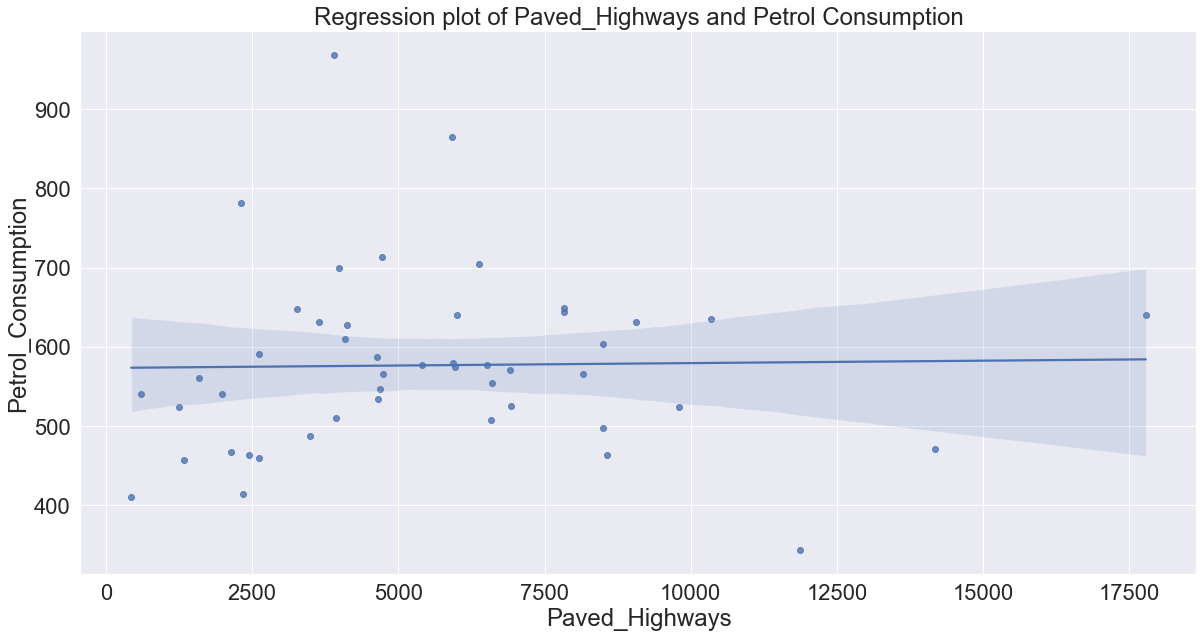

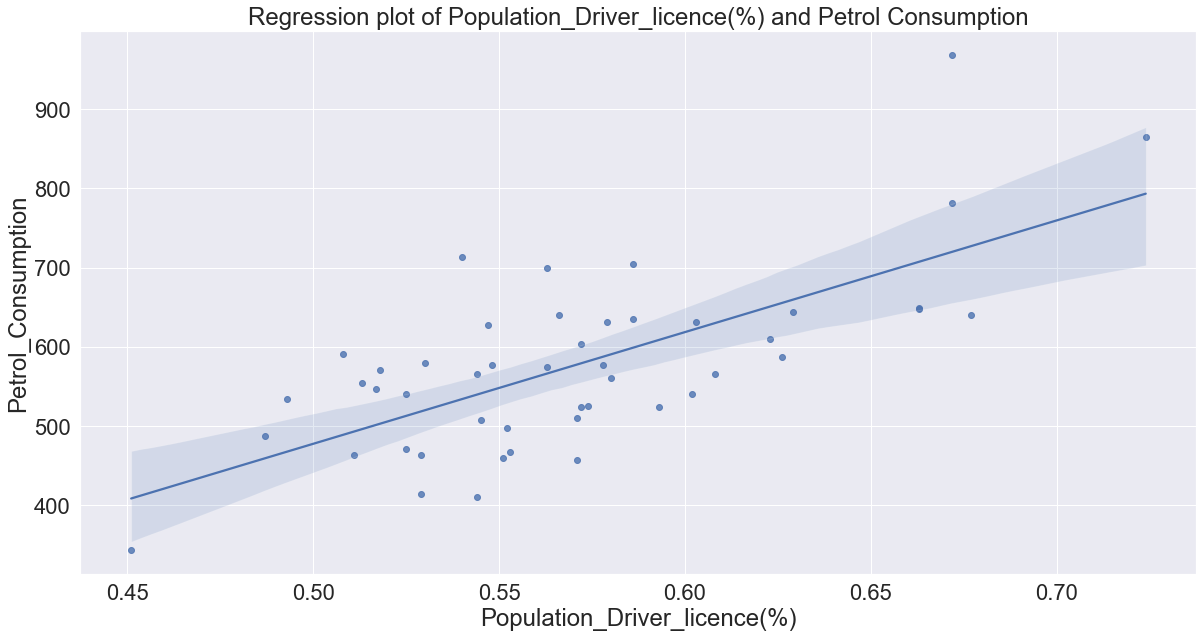

In [27]:
# Visualising the dataset
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Petrol_Consumption', data=multi_data).set(title=f'Regression plot of {var} and Petrol Consumption');  


In [28]:
# Choosing the dependent and independent variables. 
y = multi_data['Petrol_Consumption']
X = multi_data[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]  

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [30]:
X.shape

(48, 4)

In [31]:
# creating a linear regression object
multi_regressor = LinearRegression()
# fitting the regression
multi_regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
# Getting the intercept of the regression
multi_regressor.intercept_

454.9481314479245

In [33]:
# Getting the coefficients of the regression
multi_regressor.coef_

array([-7.53547579e-02, -1.52865693e-03,  1.14144102e+03, -2.70115498e+01])

In [34]:
# Get the R-squared of the regression
multi_regressor.score(X,y)

0.6558672258559509

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [35]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
X.shape

(48, 4)

In [36]:
# To get the Adjusted R-squared, we can do so by knowing the r2, the # observations, the # features
r2 = multi_regressor.score(X,y)
# Number of observations is the shape along axis 0
n = X.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2  

0.6238548747727836

In [37]:
# Import the feature selection module from sklearn
from sklearn.feature_selection import f_regression

In [38]:
f_regression(X,y)

(array([2.93395443e+00, 1.66854400e-02, 4.39408334e+01, 1.17638281e+01]),
 array([9.34684298e-02, 8.97784600e-01, 3.28960495e-08, 1.28489067e-03]))

In [39]:
# my interested is in the (p-values)
p_values = f_regression(X,y)[1]
p_values.round(4)

array([0.0935, 0.8978, 0.    , 0.0013])

In [40]:
# Create a new data frame with the names of the features
summary = pd.DataFrame(data = X.columns.values, columns=['Features'])
summary

,Features
0,Average_income
1,Paved_Highways
2,Population_Driver_licence(%)
3,Petrol_tax


In [41]:
summary ['Coefficients'] = multi_regressor.coef_
summary ['p-values'] = p_values.round(4)


summary

,Features,Coefficients,p-values
0,Average_income,-0.075355,0.0935
1,Paved_Highways,-0.001529,0.8978
2,Population_Driver_licence(%),1141.441017,0.0000
3,Petrol_tax,-27.011550,0.0013


In [42]:
y_pred = multi_regressor.predict(X_test)

In [43]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
8      464  494.464133
34     487  523.543267
21     540  549.590216
15     635  593.563562
44     782  663.433166
6      344  334.691575
18     865  727.855536
37     704  631.333753
36     640  633.953425
20     649  664.562776


In [44]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 6286.45
Mean squared error: 49830096.86
Root mean squared error: 7059.04


In [45]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.8051764835885977


In [46]:
multi_regressor.score(X_test, y_test)

0.8051764835885977

In [47]:
multi_regressor.score(X_train, y_train)

0.5495828440915251